SVM是二分类器，线性SVM分类是画出一条决策边界，使得到两个类样本的最短距离最大。
主要有hard margin classification与soft margin classification，可以通过调节超参数来调节margin
SVM直接输出样本的列别，而不是像Logistic回归那样，输出概率
sklearn中，有多种方式实现线性SVM

    LinearSVC
    SVC中，kernel设置为linear
    SGDClassifier中，loss设置为hinge，alpha设置为1/(m*C)


In [10]:
import numpy as np
from sklearn import  datasets
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.svm import  LinearSVC

In [16]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris.target==2).astype(np.float64)
svm_clf = Pipeline((("scaler",StandardScaler()), ('linear_svc', LinearSVC(C=1, loss='hinge')),))
svm_clf.fit(X,y)
res = svm_clf.predict([[5.5, 1.7]])
print(res)

[1.]


# 非线性SVM

一般现实问题中，线性模型难以解决问题，可以采用非线性SVM
对于非线性回归问题，可以先添加一个多项式的特征，即将一维数据转化为多项式数据，然后采用线性SVM；或者也可以直接采用多项式的kernel，直接进行非线性SVM的分类

SVC中的参数C越大，对于训练集来说，其误差越小，但是很容易发生过拟合；C越小，则允许有更多的训练集误分类，相当于soft margin

SVC中的参数coef0反映了高阶多项式相对于低阶多项式对模型的影响，如果发生了过拟合的现象，则可以减小coef0；如果发生了欠拟合的现象，可以试着增大coef0


In [17]:
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import  make_moons
from sklearn.preprocessing import  PolynomialFeatures

In [19]:
X,y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [24]:
X.shape

(100, 2)

In [25]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [21]:
def plot_datasets(X,y,axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0],'bs')
    plt.plot(X[:,0][y==1], X[:,1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

In [32]:
# contour函数是画出轮廓，需要给出X和Y的网格，以及对应的Z，它会画出Z的边界（相当于边缘检测及可视化）
def plot_predict(clf, axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2], axes[3],100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contour(x0, x1, y_pred, cmap=plt.cm.winter, alpha=0.5)
    plt.contour(x0, x1, y_decision, cmap = plt.cm.winter, alpha=0.2)

In [28]:
polynomial_svm_clf = Pipeline([('poly_featutres', PolynomialFeatures(degree=3)), ("scaler", StandardScaler()),
                       ('svm_clf',LinearSVC(C=10, loss='hinge',random_state=2019))])

In [29]:
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_featutres', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=2019, tol=0.0001, verbose=0))])

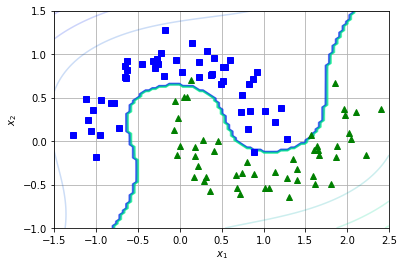

In [33]:
plot_datasets(X,y, [-1.5, 2.5, -1,1.5])
plot_predict(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

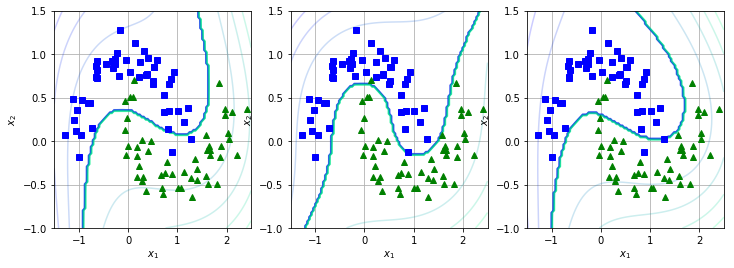

In [43]:
from sklearn.svm import  SVC

poly_kernel_svm_clf = Pipeline([('scaler', StandardScaler()), ('svm_clf', SVC(kernel="poly", 
                                                                              degree=3, coef0=1, C=0.5))])
poly_kernel_svm_clf.fit(X,y)

plt.figure(figsize=(12,4))
plt.subplot(131)
plot_datasets(X,y,[-1.5, 2.5, -1,1.5])
plot_predict(poly_kernel_svm_clf, [-1.5, 2.5, -1,1.5])

poly_kernel_svm_clf = Pipeline([('scaler', StandardScaler()), ('svm_clf', SVC(kernel="poly", 
                                                                              degree=3, coef0=1, C=10))])
poly_kernel_svm_clf.fit(X,y)
plt.subplot(132)
plot_datasets(X,y,[-1.5, 2.5, -1,1.5])
plot_predict(poly_kernel_svm_clf, [-1.5, 2.5, -1,1.5])

poly_kernel_svm_clf = Pipeline([('scaler', StandardScaler()), ('svm_clf', SVC(kernel="poly", 
                                                                              degree=3, coef0=100, C=0.5))])
poly_kernel_svm_clf.fit(X,y)
plt.subplot(133)
plot_datasets(X,y,[-1.5, 2.5, -1,1.5])
plot_predict(poly_kernel_svm_clf, [-1.5, 2.5, -1,1.5])

Gasuusian RBF核函数

当数据在低维空间中不可分割的时候，可以尝试将它们映射到高维空间，通过核函数来进行这样的映射操作，Gaussian RBF核函数为 

skleanr中，SVM是利用了libsvm，线性SVM的时间复杂度为O(mn)，带有核函数的SVM一般是O(m2n)与O(m3n)
之间
SVM一般适用于数据量不是很大，但是很复杂的问题的求解。

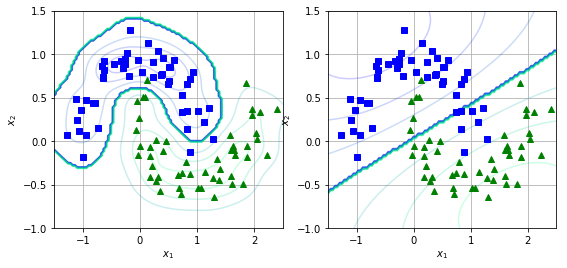

In [56]:
rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()),('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))])

plt.figure(figsize=(9,4))
plt.subplot(121)
rbf_kernel_svm_clf.fit(X,y)
plot_datasets(X,y, [-1.5, 2.5, -1,1.5])
plot_predict(rbf_kernel_svm_clf,[-1.5, 2.5, -1,1.5])

rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()),('svm_clf', SVC(kernel='rbf', gamma=0.1, C=0.001))])

plt.subplot(122)
rbf_kernel_svm_clf.fit(X,y)
plot_datasets(X,y, [-1.5, 2.5, -1,1.5])
plot_predict(rbf_kernel_svm_clf,[-1.5, 2.5, -1,2.5])

# SVM回归

可以用于回归问题，有线性SVM与非线性SVM回归
线性回归时，有一个变量ε

    ，这是SVM的margin

非线性SVM回归

    多项式回归，指定SVM的kernel为poly即可


In [58]:
from sklearn.svm import  LinearSVR

In [59]:
np.random.seed(2019)

In [60]:
m = 50
X = 2*np.random.rand(m,1)
y = (4+3*X+np.random.randn(m,1)).ravel()

In [61]:
def find_support_vector(svm_reg, X,y):
    y_pred = svm_reg.predict(X)
    off_margin = np.abs(y-y_pred) >= svm_reg.epsilon
    return np.argwhere(off_margin)

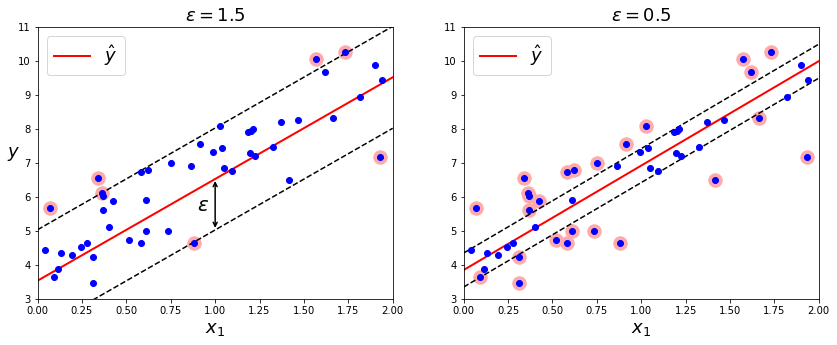

In [68]:
from sklearn.svm import LinearSVR
np.random.seed( 42 )
m = 50
X = 2*np.random.rand(m, 1)
y = (4+3*X+np.random.randn(m,1)).ravel()

# 找到训练集中所有支持向量的下标
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict( X )
    off_margin = np.abs(y-y_pred) >= svm_reg.epsilon
    # 返回off_margin中值为True的下标
    return np.argwhere( off_margin )

def plot_svm_regression( svm_reg, X, y, axes ):
    x1s = np.linspace( axes[0], axes[1], 100 ).reshape(-1,1)
    y_pred = svm_reg.predict(x1s)
    plt.plot( x1s, y_pred, "r-", linewidth=2, label=r"$\hat{y}$" )
    plt.plot( x1s, y_pred-svm_reg.epsilon, "k--" )
    plt.plot( x1s, y_pred+svm_reg.epsilon, "k--" )
    plt.plot( X, y, "bo" )
    plt.scatter( X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors="#FFAAAA" )
                
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)


svm_reg_1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg_2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg_1.fit( X, y )
svm_reg_2.fit( X, y )

svm_reg_1.support_ = find_support_vectors( svm_reg_1, X, y )
svm_reg_2.support_ = find_support_vectors( svm_reg_2, X, y )

eps_x1 = 1
eps_y_pred = svm_reg_1.predict([[eps_x1]])

plt.figure( figsize=(14,5) )
plt.subplot(121)
plot_svm_regression( svm_reg_1, X, y, [0, 2, 3, 11] )
plt.title(r"$\epsilon = {}$".format(svm_reg_1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg_1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.9, 5.6, r"$\epsilon$", fontsize=20)

plt.subplot(122)
plot_svm_regression(svm_reg_2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_2.epsilon), fontsize=18)
plt.show()


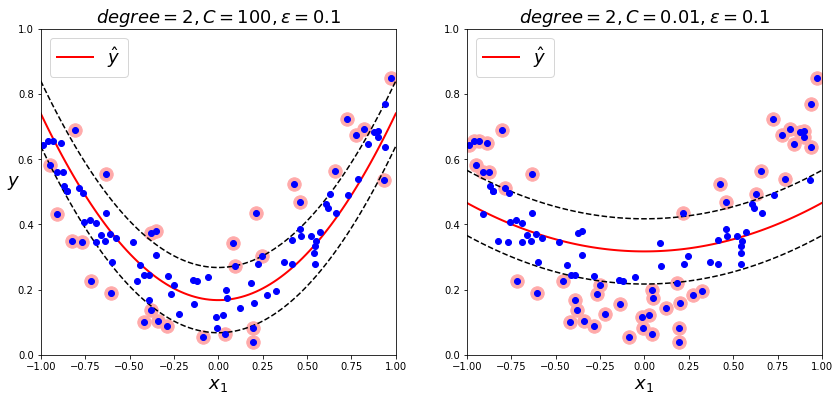

In [65]:
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()